ALL MODELS DESCIRBED HERE RUN THE ENTIRE DATA PREP AND FEATURE ENGINEERING NOTEBOOKS 
ALSO RUNNING ON HOUR FREQUENCY 
BATCH SIZE 128
EPOCHS 25

sub 39 : 
        model_A = Sequential()

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l1_l2"))
        model_A.add(Dense(64, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l1_l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 39: 
                64/64 [==============================] - 1s 8ms/step
                1095.9252690802348
                77/77 [==============================] - 1s 8ms/step
                108.4554586038961
                76/76 [==============================] - 3s 10ms/step
                91.25587557006634

sub 40: 
        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dropout(0.4))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 40: 
                64/64 [==============================] - 0s 7ms/step
                997.0125978473582
                77/77 [==============================] - 0s 5ms/step
                112.36317978896103
                76/76 [==============================] - 4s 12ms/step
                74.19562992330016

sub 41: 

        model_A.add(LSTM(128, return_sequences=True, input_shape=(X_train_A.shape[1], X_train_A.shape[2])))  # returns a sequence of vectors of dimension 32
        model_A.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
        model_A.add(GRU(64, activity_regularizer="l2"))
        model_A.add(Dense(64, activity_regularizer="l2"))
        model_A.add(Dense(32, activity_regularizer="l2"))
        model_A.add(Dense(16, activity_regularizer="l2"))
        model_A.add(Dense(1))
        model_A.build(input_shape=(1,21))
        model_A.summary()
        model_A.compile(loss='mean_absolute_error', optimizer='adam')

        local loss 41: 
                64/64 [==============================] - 3s 12ms/step
                1141.0985812133072
                77/77 [==============================] - 2s 6ms/step
                114.32893668831169
                76/76 [==============================] - 3s 11ms/step
                93.95477041873964
                










In [2]:
%load_ext autoreload
%autoreload 2

# Notebook for running RNN model

RNN models (Recurent Neural Network) have LSTM neurons that hopefully can pick up on patterns evolving over time. 

In [3]:
import tensorflow
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
%store -r dm 
dm = dm


In [4]:
dm.combine_all_data()

['X_test_estimated_a', 'data_A']
['X_test_estimated_b', 'data_B']
['X_test_estimated_c', 'data_C']


In [19]:

from sklearn.model_selection import train_test_split


X = dm.data.iloc[:, 2:]
y = dm.data.iloc[:, 1]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = X.columns
locs = X["location"]
X = X.drop("location", axis=1)
X = pd.DataFrame(scaler.fit_transform(X))
X["location"] = locs
X.columns = cols


X_A = X[X["location"] == 0].iloc[:, 2:-1]
y_A = dm.data_A.iloc[:, 1]
X_B = X[X["location"] == 1].iloc[:, 2:-1]
y_B = dm.data_B.iloc[:, 1]
X_C = X[X["location"] == 2].iloc[:, 2:-1]
y_C = dm.data_C.iloc[:, 1]

X_A = dm.add_location(X_A, "A")
X_B = dm.add_location(X_B, "B")
X_C = dm.add_location(X_C, "C")

X_train_A = X_A.iloc[0:int(0.7*X_A.shape[0]):]
y_train_A = y_A.iloc[0:int(0.7*y_A.shape[0]):]
X_test_A = X_A.iloc[-int(0.3*X_A.shape[0]):] 
y_test_A = y_A.iloc[-int(0.3*y_A.shape[0]):]

X_test_A, X_validate_A, y_test_A, y_validate_A = train_test_split(X_test_A, y_test_A, train_size=0.4)

X_train_B = X_B.iloc[0:int(0.7*X_B.shape[0]):]
y_train_B = y_B.iloc[0:int(0.7*y_B.shape[0]):]
X_test_B = X_B.iloc[-int(0.3*X_B.shape[0]):] 
y_test_B = y_B.iloc[-int(0.3*y_B.shape[0]):] 

X_test_B, X_validate_B, y_test_B, y_validate_B = train_test_split(X_test_B, y_test_B, train_size=0.4)

X_train_C = X_C.iloc[0:int(0.7*X_C.shape[0]):]
y_train_C = y_C.iloc[0:int(0.7*y_C.shape[0]):]
X_test_C = X_C.iloc[-int(0.3*X_C.shape[0]):] 
y_test_C = y_C.iloc[-int(0.3*y_C.shape[0]):] 

X_test_C, X_validate_C, y_test_C, y_validate_C = train_test_split(X_test_C, y_test_C, train_size=0.4)

X_train = pd.concat([X_train_A, X_train_B, X_train_C], ignore_index=True)
X_validate = pd.concat([X_validate_A, X_validate_B, X_validate_C], ignore_index=True)
X_test = pd.concat([X_test_A, X_test_B, X_test_C], ignore_index=True)

y_train = pd.concat([y_train_A, y_train_B, y_train_C], ignore_index=True)
y_validate = pd.concat([y_validate_A, y_validate_B, y_validate_C], ignore_index=True)
y_test = pd.concat([y_test_A, y_test_B, y_test_C], ignore_index=True)




# X_train_A, X_validate_A, y_train_A, y_validate_A = train_test_split(X_A_train, y_A_train, shuffle=False, train_size=0.9)
# #X_validate_A, X_test_A, y_validate_A, y_test_A = train_test_split(X_validate_A, y_validate_A, shuffle=False, test_size=0.3)

# X_train_B, X_validate_B, y_train_B, y_validate_B = train_test_split(X_B_train, y_B_train, shuffle=False, train_size=0.9)
# #X_validate_B, X_test_B, y_validate_B, y_test_B = train_test_split(X_validate_B, y_validate_B, shuffle=False, test_size=0.3)

# X_train_C, X_validate_C, y_train_C, y_validate_C = train_test_split(X_C_train, y_C_train, shuffle=False, train_size=0.9)
# #X_validate_C, X_test_C, y_validate_C, y_test_C = train_test_split(X_validate_C, y_validate_C, shuffle=False, test_size=0.3)

# X, X_validate, y, y_validate = train_test_split(X_train, y_train, shuffle=False, train_size=0.8)

# X_A_submission = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
# X_B_submission = dm.X_test_estimated_b[dm.X_test_estimated_b.columns.intersection(X_B_train.columns)]
# X_C_submission = dm.X_test_estimated_c[dm.X_test_estimated_c.columns.intersection(X_C_train.columns)]
X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X_A.columns)]

from sklearn.preprocessing import MinMaxScaler
scaler_sub = MinMaxScaler()
cols = X_submission.columns
locs = X_submission["location"]
X_submission = X_submission.drop("location", axis=1)
X_submission = pd.DataFrame(scaler_sub.fit_transform(X_submission))
X_submission["location"] = locs
X_submission.columns = cols

# print(X_train_A.shape, y_train_A.shape, X_validate_A.shape, y_validate_A.shape)
# print(X_train_B.shape, y_train_B.shape, X_validate_B.shape, y_validate_B.shape)
# print(X_train_C.shape, y_train_C.shape, X_validate_C.shape, y_validate_C.shape)

print(X_train.shape, y_train.shape, X_submission.shape)

(61234, 46) (61234,) (2160, 46)


In [22]:
import LSTM_class

model_number_features = X.shape[1]
model_number_timesteps = 1

super_model = LSTM_class.RNN_Network() ## initialize LSTM Class 
super_model.create_model(model_number_features, model_number_timesteps) ## builds model for A B and C, builds same for each 



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 1, 120)            52320     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 1, 120)            86880     
 onal)                                                           
                                                                 
 time_distributed_6 (TimeDi  (None, 1, 64)             7744      
 stributed)                                                      
                                                                 
 time_distributed_7 (TimeDi  (None, 1, 48)             3120      
 stributed)                                                      
                                                                 
 time_distributed_8 (TimeDi  (None, 1, 1)             

In [23]:
#super_model.fit_model(super_model.model_A, X_train_A, y_train_A)
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=15,
    max_train_size=18000,
    test_size=3000,
)

all_splits = list(ts_cv.split(X, y))




super_model.fit_model_timeseries(super_model.model_A, all_splits, X, y, training_parameters={"epochs":100, "batch_size":128, "timesteps":model_number_timesteps})


  0%|          | 0/100 [00:00<?, ?it/s]2023-11-07 17:10:04.347273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


141/141 [==============================] - 6s 39ms/step - loss: 98.8010 - val_loss: 40.7820


  1%|          | 1/100 [00:53<1:28:38, 53.72s/it]

141/141 [==============================] - 5s 39ms/step - loss: 98.1458 - val_loss: 39.7983


  2%|▏         | 2/100 [01:21<1:02:42, 38.39s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.8639 - val_loss: 39.5250


  3%|▎         | 3/100 [01:49<54:11, 33.52s/it]  

141/141 [==============================] - 6s 39ms/step - loss: 97.7396 - val_loss: 39.5588


  4%|▍         | 4/100 [02:16<49:55, 31.20s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.6426 - val_loss: 39.5316


  5%|▌         | 5/100 [02:44<47:25, 29.95s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.5725 - val_loss: 39.4969


  6%|▌         | 6/100 [03:12<45:46, 29.22s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.5290 - val_loss: 39.4592


  7%|▋         | 7/100 [03:40<44:36, 28.78s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.4873 - val_loss: 39.6150


  8%|▊         | 8/100 [04:08<43:40, 28.48s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.4544 - val_loss: 39.4237


  9%|▉         | 9/100 [04:35<42:48, 28.23s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.4168 - val_loss: 39.4100


 10%|█         | 10/100 [05:03<42:08, 28.09s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.3859 - val_loss: 39.4200


 11%|█         | 11/100 [05:31<41:29, 27.97s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.3601 - val_loss: 39.3813


 12%|█▏        | 12/100 [05:58<40:55, 27.91s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.3393 - val_loss: 39.3732


 13%|█▎        | 13/100 [06:26<40:29, 27.92s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.3190 - val_loss: 39.3666


 14%|█▍        | 14/100 [06:54<39:57, 27.88s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.3027 - val_loss: 39.3637


 15%|█▌        | 15/100 [07:22<39:28, 27.87s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.2873 - val_loss: 39.3561


 16%|█▌        | 16/100 [07:50<39:01, 27.88s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.2734 - val_loss: 39.4699


 17%|█▋        | 17/100 [08:18<38:31, 27.85s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.2607 - val_loss: 39.4081


 18%|█▊        | 18/100 [08:46<38:06, 27.89s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.2481 - val_loss: 39.3477


 19%|█▉        | 19/100 [09:14<37:50, 28.03s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.2346 - val_loss: 39.3525


 20%|██        | 20/100 [09:42<37:30, 28.13s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.2252 - val_loss: 39.3388


 21%|██        | 21/100 [10:10<37:00, 28.11s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.2168 - val_loss: 39.3480


 22%|██▏       | 22/100 [10:38<36:26, 28.03s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.2121 - val_loss: 39.3432


 23%|██▎       | 23/100 [11:06<35:46, 27.88s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.2063 - val_loss: 39.3351


 24%|██▍       | 24/100 [11:33<35:08, 27.74s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1993 - val_loss: 39.3301


 25%|██▌       | 25/100 [12:01<34:40, 27.74s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1925 - val_loss: 39.3201


 26%|██▌       | 26/100 [12:29<34:08, 27.69s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1868 - val_loss: 39.3205


 27%|██▋       | 27/100 [12:56<33:38, 27.65s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1799 - val_loss: 39.3304


 28%|██▊       | 28/100 [13:24<33:09, 27.64s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1779 - val_loss: 39.3206


 29%|██▉       | 29/100 [13:51<32:38, 27.58s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1748 - val_loss: 39.3213


 30%|███       | 30/100 [14:19<32:12, 27.61s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1679 - val_loss: 39.3261


 31%|███       | 31/100 [14:47<31:47, 27.65s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.1655 - val_loss: 39.3121


 32%|███▏      | 32/100 [15:14<31:21, 27.67s/it]

141/141 [==============================] - 5s 38ms/step - loss: 97.1621 - val_loss: 39.3168


 33%|███▎      | 33/100 [15:42<30:49, 27.61s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1584 - val_loss: 39.3080


 34%|███▍      | 34/100 [16:09<30:20, 27.58s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.1534 - val_loss: 39.3069


 35%|███▌      | 35/100 [16:37<29:55, 27.62s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1475 - val_loss: 39.3876


 36%|███▌      | 36/100 [17:05<29:32, 27.70s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1419 - val_loss: 39.4041


 37%|███▋      | 37/100 [17:32<29:03, 27.67s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1320 - val_loss: 39.4588


 38%|███▊      | 38/100 [18:00<28:31, 27.61s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1241 - val_loss: 39.3416


 39%|███▉      | 39/100 [18:28<28:03, 27.59s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.1189 - val_loss: 39.3265


 40%|████      | 40/100 [18:55<27:35, 27.59s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1142 - val_loss: 39.3805


 41%|████      | 41/100 [19:23<27:07, 27.59s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1130 - val_loss: 39.2778


 42%|████▏     | 42/100 [19:50<26:40, 27.60s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1092 - val_loss: 39.2734


 43%|████▎     | 43/100 [20:18<26:09, 27.54s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1062 - val_loss: 39.3643


 44%|████▍     | 44/100 [20:45<25:43, 27.57s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.1021 - val_loss: 39.2843


 45%|████▌     | 45/100 [21:13<25:15, 27.56s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0971 - val_loss: 39.2820


 46%|████▌     | 46/100 [21:40<24:48, 27.57s/it]

141/141 [==============================] - 5s 38ms/step - loss: 97.0903 - val_loss: 39.3351


 47%|████▋     | 47/100 [22:08<24:19, 27.54s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0835 - val_loss: 39.3170


 48%|████▊     | 48/100 [22:36<23:52, 27.55s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0783 - val_loss: 39.3586


 49%|████▉     | 49/100 [23:03<23:25, 27.55s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0718 - val_loss: 39.3298


 50%|█████     | 50/100 [23:31<22:59, 27.59s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0684 - val_loss: 39.3204


 51%|█████     | 51/100 [23:58<22:31, 27.58s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0663 - val_loss: 39.3330


 52%|█████▏    | 52/100 [24:26<22:01, 27.53s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0633 - val_loss: 39.3592


 53%|█████▎    | 53/100 [24:53<21:34, 27.54s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0573 - val_loss: 39.2501


 54%|█████▍    | 54/100 [25:21<21:07, 27.56s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0590 - val_loss: 39.3401


 55%|█████▌    | 55/100 [25:49<20:41, 27.58s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0589 - val_loss: 39.3111


 56%|█████▌    | 56/100 [26:16<20:17, 27.68s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0549 - val_loss: 39.3095


 57%|█████▋    | 57/100 [26:44<19:47, 27.63s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0543 - val_loss: 39.3132


 58%|█████▊    | 58/100 [27:12<19:19, 27.62s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0546 - val_loss: 39.3066


 59%|█████▉    | 59/100 [27:39<18:53, 27.65s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0510 - val_loss: 39.3206


 60%|██████    | 60/100 [28:07<18:25, 27.63s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0452 - val_loss: 39.3069


 61%|██████    | 61/100 [28:34<17:55, 27.59s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0426 - val_loss: 39.3549


 62%|██████▏   | 62/100 [29:02<17:28, 27.59s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0418 - val_loss: 39.4357


 63%|██████▎   | 63/100 [29:30<17:01, 27.60s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0408 - val_loss: 39.2728


 64%|██████▍   | 64/100 [29:57<16:32, 27.58s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0378 - val_loss: 39.2738


 65%|██████▌   | 65/100 [30:25<16:05, 27.57s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0396 - val_loss: 39.4720


 66%|██████▌   | 66/100 [30:52<15:36, 27.55s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0394 - val_loss: 39.2648


 67%|██████▋   | 67/100 [31:20<15:09, 27.55s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0376 - val_loss: 39.2567


 68%|██████▊   | 68/100 [31:47<14:41, 27.56s/it]

141/141 [==============================] - 5s 38ms/step - loss: 97.0369 - val_loss: 39.2631


 69%|██████▉   | 69/100 [32:15<14:13, 27.54s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0373 - val_loss: 39.2630


 70%|███████   | 70/100 [32:42<13:46, 27.56s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0363 - val_loss: 39.2647


 71%|███████   | 71/100 [33:10<13:18, 27.54s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.0343 - val_loss: 39.3213


 72%|███████▏  | 72/100 [33:38<12:53, 27.61s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0337 - val_loss: 39.2560


 73%|███████▎  | 73/100 [34:05<12:25, 27.63s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0319 - val_loss: 39.2753


 74%|███████▍  | 74/100 [34:33<11:57, 27.62s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0295 - val_loss: 39.2679


 75%|███████▌  | 75/100 [35:00<11:30, 27.60s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0252 - val_loss: 39.2882


 76%|███████▌  | 76/100 [35:28<11:02, 27.59s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0220 - val_loss: 39.2709


 77%|███████▋  | 77/100 [35:56<10:34, 27.59s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0231 - val_loss: 39.2704


 78%|███████▊  | 78/100 [36:23<10:06, 27.56s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0205 - val_loss: 39.5163


 79%|███████▉  | 79/100 [36:51<09:38, 27.55s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0207 - val_loss: 39.2822


 80%|████████  | 80/100 [37:18<09:10, 27.50s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0236 - val_loss: 39.4252


 81%|████████  | 81/100 [37:46<08:42, 27.51s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0206 - val_loss: 39.3106


 82%|████████▏ | 82/100 [38:13<08:15, 27.50s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0238 - val_loss: 39.2757


 83%|████████▎ | 83/100 [38:41<07:47, 27.50s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0182 - val_loss: 39.2791


 84%|████████▍ | 84/100 [39:08<07:20, 27.52s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0225 - val_loss: 39.4238


 85%|████████▌ | 85/100 [39:36<06:52, 27.48s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0246 - val_loss: 39.2904


 86%|████████▌ | 86/100 [40:03<06:25, 27.51s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0261 - val_loss: 39.2835


 87%|████████▋ | 87/100 [40:31<05:57, 27.54s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0280 - val_loss: 39.2883


 88%|████████▊ | 88/100 [40:58<05:30, 27.55s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0252 - val_loss: 39.2867


 89%|████████▉ | 89/100 [41:26<05:04, 27.66s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.0258 - val_loss: 39.2857


 90%|█████████ | 90/100 [41:54<04:37, 27.75s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.0250 - val_loss: 39.2848


 91%|█████████ | 91/100 [42:22<04:11, 27.91s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.0292 - val_loss: 39.2845


 92%|█████████▏| 92/100 [42:51<03:45, 28.15s/it]

141/141 [==============================] - 6s 40ms/step - loss: 97.0192 - val_loss: 39.3573


 93%|█████████▎| 93/100 [43:20<03:18, 28.29s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0155 - val_loss: 39.2671


 94%|█████████▍| 94/100 [43:48<02:49, 28.25s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0131 - val_loss: 39.3772


 95%|█████████▌| 95/100 [44:16<02:20, 28.14s/it]

141/141 [==============================] - 6s 39ms/step - loss: 97.0053 - val_loss: 39.3527


 96%|█████████▌| 96/100 [44:43<01:52, 28.00s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0045 - val_loss: 39.3508


 97%|█████████▋| 97/100 [45:11<01:23, 27.92s/it]

141/141 [==============================] - 5s 39ms/step - loss: 96.9997 - val_loss: 39.3641


 98%|█████████▊| 98/100 [45:39<00:55, 27.82s/it]

141/141 [==============================] - 5s 39ms/step - loss: 96.9983 - val_loss: 39.4846


 99%|█████████▉| 99/100 [46:06<00:27, 27.69s/it]

141/141 [==============================] - 5s 39ms/step - loss: 97.0007 - val_loss: 39.3954


100%|██████████| 100/100 [46:34<00:00, 27.94s/it]


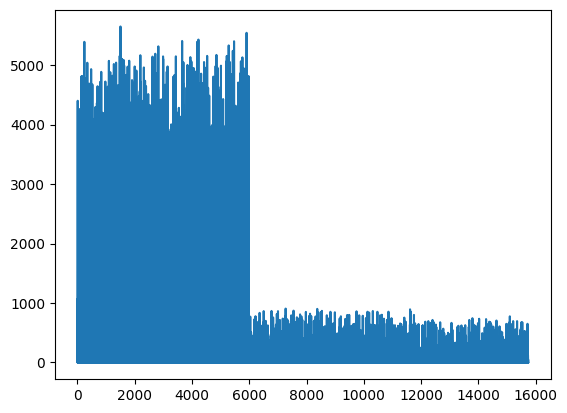

In [24]:
gt = y_validate

plt.plot(gt)
plt.show()



In [25]:

preds = super_model.model_A.predict((np.asarray(X_validate).reshape(int(X_validate.shape[0]/model_number_timesteps), model_number_timesteps, X_validate.shape[1])).astype(float))
gt = y_validate


ValueError: in user code:

    File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/engine/training.py", line 2357, in predict_step
        return self(x, training=False)
    File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/jonasolsen/Documents/Skole/IIkt/5_semester/TDT4173 - Maskinlæring/ve/group_project/.venv/lib/python3.9/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'bidirectional_4' (type Bidirectional).
    
    Input 0 of layer "forward_lstm_4" is incompatible with the layer: expected shape=(None, None, 48), found shape=(None, 1, 46)
    
    Call arguments received by layer 'bidirectional_4' (type Bidirectional):
      • inputs=tf.Tensor(shape=(None, 1, 46), dtype=float32)
      • training=False
      • mask=None
      • initial_state=None
      • constants=None


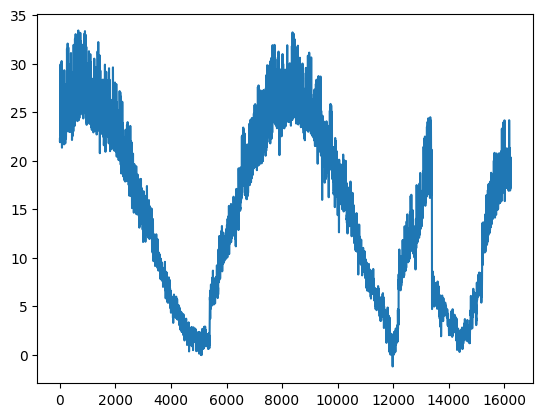

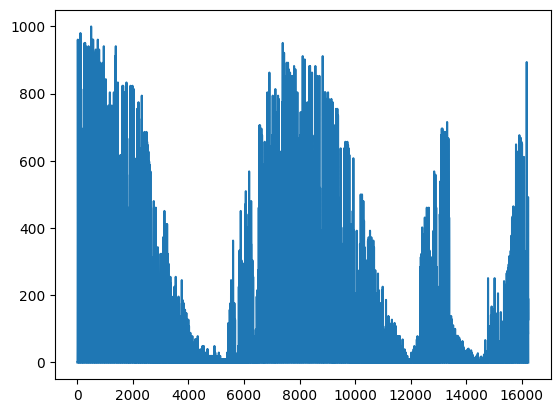

1734411.2085719565


In [160]:
from keras.losses import mean_absolute_error

plt.plot(np.asarray(preds).reshape((preds.shape[0], )))

plt.show()

gt = pd.DataFrame(gt)
gt = gt.reset_index().drop("index", axis=1)

plt.plot(gt)
plt.show()

error = mean_absolute_error(gt, preds)
print(np.sum(error)/error.shape[0])


## Testing our model locally

In [ ]:
## Specify the model to be used
pred_A = super_model.model_A.predict(np.asarray(X_A_submission).reshape((X_A_submission.shape[0], 1, X_A_submission.shape[1])).astype(float))
pred_B = super_model.model_A.predict(np.asarray(X_B_submission).reshape((X_B_submission.shape[0], 1, X_B_submission.shape[1])).astype(float))
pred_C = super_model.model_A.predict(np.asarray(X_C_submission).reshape((X_C_submission.shape[0], 1, X_C_submission.shape[1])).astype(float))

pred_A = pd.DataFrame(pred_A.reshape((720,)))
pred_B = pd.DataFrame(pred_B.reshape((720,)))
pred_C = pd.DataFrame(pred_C.reshape((720,)))

pred_A = dm.scaling(pred_A, "A")
pred_B = dm.scaling(pred_B, "B")
pred_C = dm.scaling(pred_C, "C")

test = pd.read_csv('test.csv')

df_mid = pd.concat([pred_A, pred_B], ignore_index=True)

df = pd.concat([df_mid, pred_C], join="inner", ignore_index=True)

# df[df<0] = 0

# NAME THE FILE 
df.to_csv("sub84.csv")


23/23 [==============================] - 0s 13ms/step
not emptu
not emptu
not emptu
